In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/rygielcorpuz/machinelearning/main/house.csv');
df.dropna()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4040,14,600.285032,499.92,84.714882,1,2,115050.425194
4041,14,242.912020,1408.20,94.257176,2,34,99862.768731
4042,14,381.986238,1600.48,175.757426,2,64,103316.062406
4043,17,750.971604,402.62,40.985933,1,80,118134.771190


In [ ]:
class PreProcess:
  def __init__(self):
    pass

  def missVal(self,df):
    missing_values = df.isnull().sum()
    missing_values_in_column = df['price'].isnull().sum()
    print("Missing values:")
    print(missing_values)
    print("\nMissing values in column_name:")
    print(missing_values_in_column)

  def dupRows(self,df):
    duplicate_rows = df[df.duplicated()]
    duplicate_rows_specific = df[df.duplicated(subset=['bedroom_count','net_sqm', 'center_distance','metro_distance','floor','age','price'])]
    print("Duplciated Rows in the dataset:")
    print(duplicate_rows)
    print("\nDuplicated Rows based on specific columns:")
    print(duplicate_rows_specific)

  def dataCheck(self,df):
    column_dt = df.dtypes
    category_col = column_dt[column_dt == 'object']
    print("Categorical Columns:")
    print(category_col)


In [ ]:
preprocess = PreProcess()
preprocess.missVal(df)
preprocess.dupRows(df)
preprocess.dataCheck(df)

Missing values:
bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

Missing values in column_name:
0
Duplciated Rows in the dataset:
Empty DataFrame
Columns: [bedroom_count, net_sqm, center_distance, metro_distance, floor, age, price]
Index: []

Duplicated Rows based on specific columns:
Empty DataFrame
Columns: [bedroom_count, net_sqm, center_distance, metro_distance, floor, age, price]
Index: []
Categorical Columns:
Series([], dtype: object)


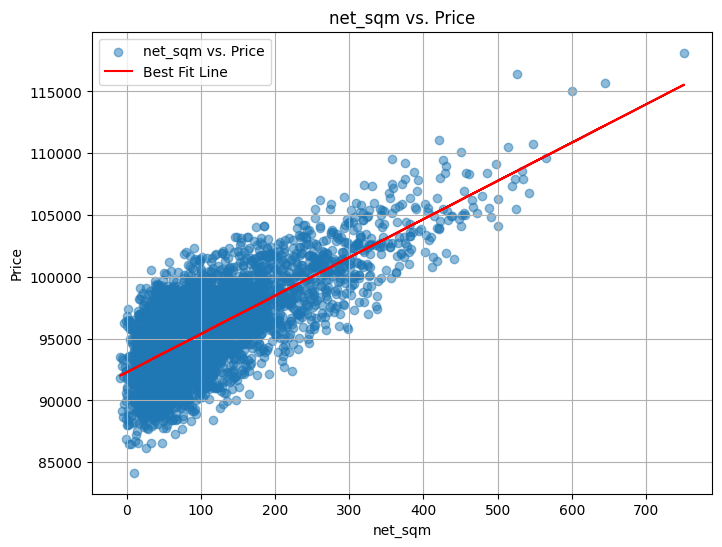

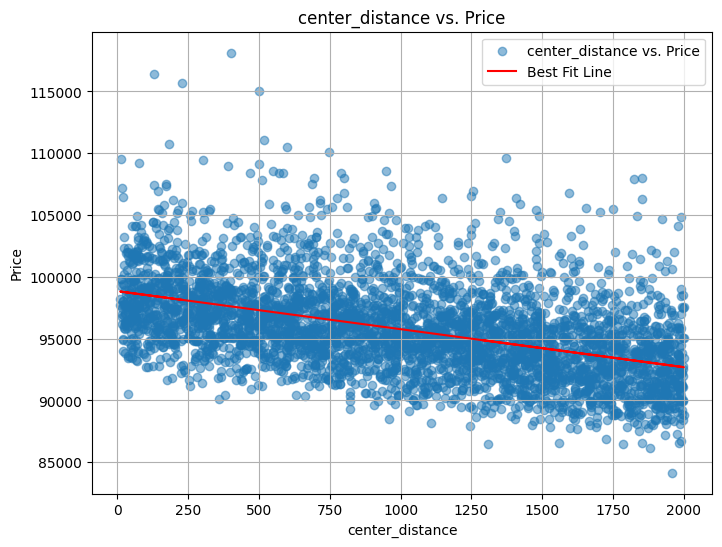

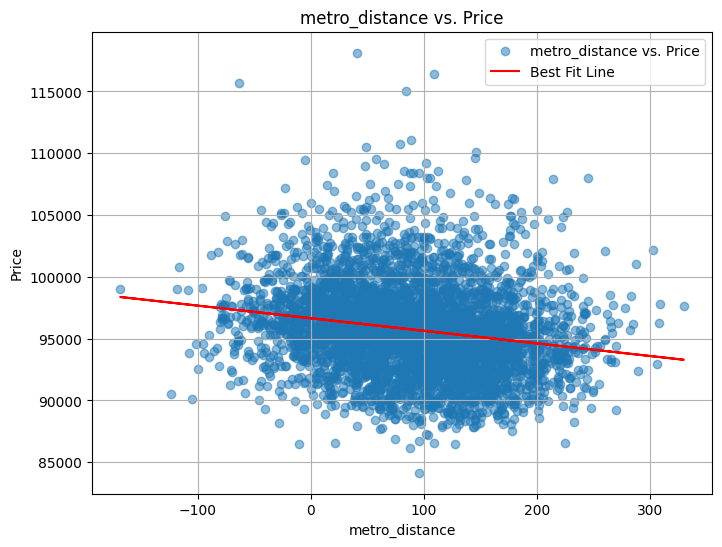

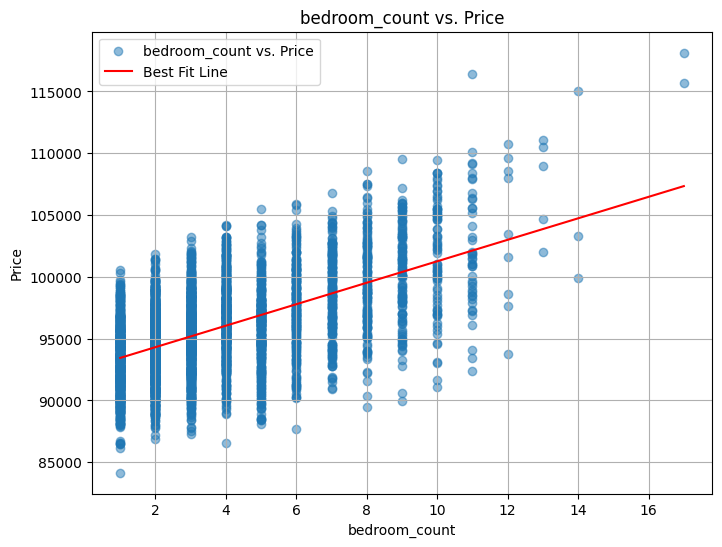

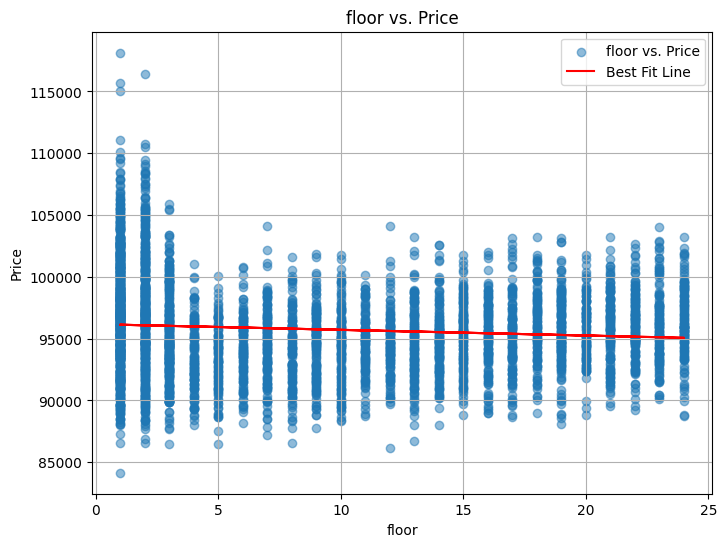

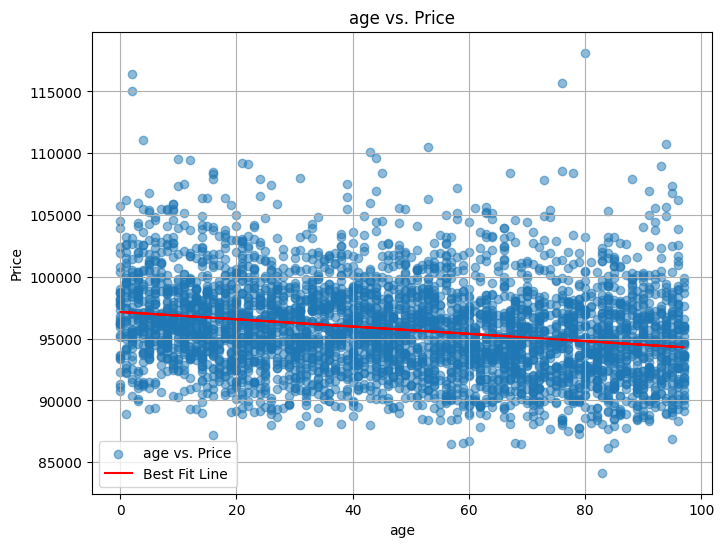

In [ ]:
# Assuming you have X and Y as NumPy arrays
X = df[['net_sqm', 'center_distance', 'metro_distance', 'bedroom_count', 'floor', 'age']].values
Y = df['price'].values
variables = ['net_sqm', 'center_distance', 'metro_distance', 'bedroom_count', 'floor', 'age']

# Loop through each independent variable and plot it against the dependent variable
for i in range(X.shape[1]):
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(X[:, i], Y, alpha=0.5, label=f'{variables[i]} vs. Price')

    # Calculate and plot the best-fit line
    coefficients = np.polyfit(X[:, i], Y, 1)
    best_fit_line = np.poly1d(coefficients)
    plt.plot(X[:, i], best_fit_line(X[:, i]), color='red', label='Best Fit Line')

    plt.xlabel(variables[i])
    plt.ylabel('Price')
    plt.title(f'{variables[i]} vs. Price')
    plt.legend()
    plt.grid(True)
    plt.show()


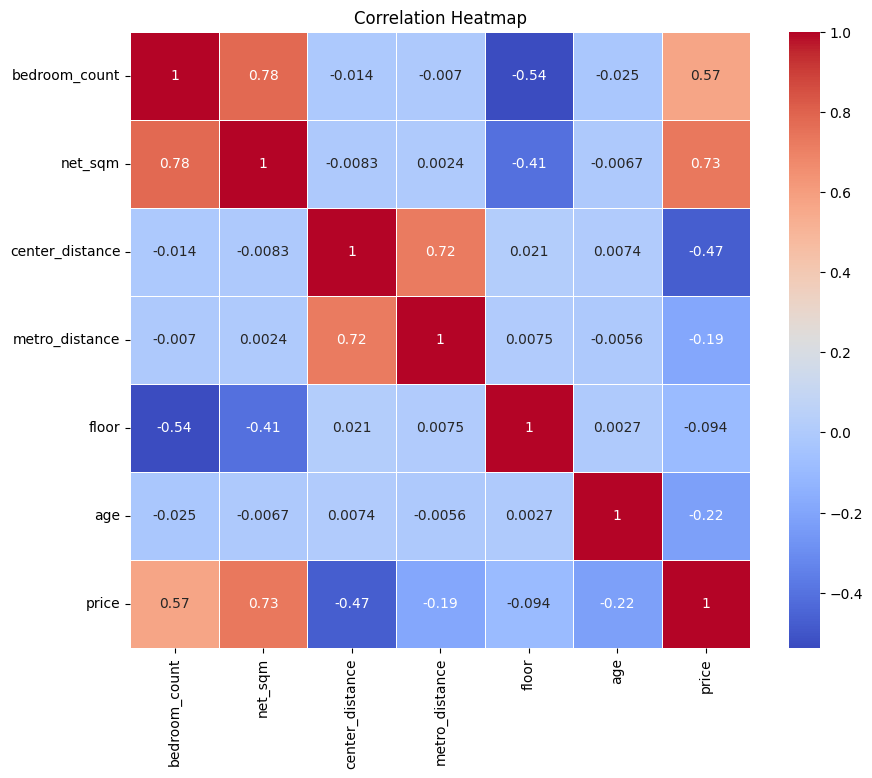

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import numpy as np

class LinearRegressionGradientDescent:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = np.random.rand()
        starting_weights = model.weights
        print("Starting Guessed Weights:", starting_weights)
        # Gradient Descent
        for _ in range(self.num_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            gradientWeight = (1/num_samples) * np.dot(X.T, (y_predicted - y))
            gradientBias = (1/num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * gradientWeight
            self.bias -= self.learning_rate * gradientBias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
      y_bar = np.mean(y_true)
      ss_total = np.sum((y_true - y_bar) ** 2)
      ss_residual = np.sum((y_true - y_pred) ** 2)
      r2 = 1 - (ss_residual / ss_total)
      return r2


    def test_squared_error(self, X_test, y_test):
        y_pred = self.predict(X_test)
        test_error = self.mse(y_test, y_pred)
        return test_error

    def train_squared_error(self, X_train, y_train):
        y_pred = self.predict(X_train)
        train_error = self.mse(y_train, y_pred)
        return train_error

    def print_predictions(self, X):
        predictions = self.predict(X)
        for pred in predictions:
            print(f"Prediction: {pred:.2f}")

    def print_weights(self):
      print("Weights Coefficients: [", end="")
      for i, weight in enumerate(self.weights):
        print(f"{weight:.2f}", end=", " if i < len(self.weights) - 1 else "")
      print("]")
      print(f"Bias: {self.bias:.2f}")


    def normalize_features(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_normalized = (X - mean) / (std + 1e-8)  # Add a small value to avoid division by zero
        return X_normalized



In [ ]:
def log_results(learning_rate,num_iterations, mse,test_error,train_error):
    with open("log.txt", "a") as log_file:
        log_file.write("Parameters:\n")
        log_file.write(f"Learning Rate: {learning_rate}\n")
        log_file.write(f"Number of Iterations: {num_iterations}\n")
        log_file.write(f"MSE: {mse}\n")
        log_file.write(f"Test Error {test_error}\n")
        log_file.write(f"Train Error: {train_error}\n")
        log_file.write("-" * 50 + "\n")


In [ ]:
X = df[['net_sqm', 'center_distance', 'metro_distance', 'bedroom_count', 'floor', 'age']].values
Y = df['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
learning_rates = [0.01, 0.1, 0.2,0.5]
num_iterations_list = [100, 500, 1000,10000]
for learning_rate in learning_rates:
    for num_iterations in num_iterations_list:
        model = LinearRegressionGradientDescent(learning_rate=learning_rate, num_iterations=num_iterations)
        X_train_normalized = model.normalize_features(X_train)
        X_test_normalized = model.normalize_features(X_test)
        model.train(X_train_normalized, Y_train)
        Y_pred = model.predict(X_test_normalized)
        mse = model.mse(Y_test, Y_pred)
        test_squared_error = model.test_squared_error(X_test_normalized, Y_test)
        train_squared_error = model.train_squared_error(X_train_normalized, Y_train)
        test_error = math.sqrt(test_squared_error)
        train_error = math.sqrt(train_squared_error)

        print("Log Entered")
        # Log the results for this trial
        parameters = {'learning_rate': learning_rate, 'num_iterations': num_iterations}
        log_results(learning_rate,num_iterations, mse,train_error, test_error)

Starting Guessed Weights: [0.62400761 0.14562798 0.53627986 0.09875804 0.10200634 0.50873602]
Log Entered
Starting Guessed Weights: [0.9234443  0.2098355  0.37187981 0.33821498 0.44029854 0.01170045]
Log Entered
Starting Guessed Weights: [0.27877581 0.48097802 0.42426967 0.08565975 0.26164795 0.92733984]
Log Entered
Starting Guessed Weights: [0.01296339 0.44620849 0.01000375 0.58593154 0.61442289 0.63886117]
Log Entered
Starting Guessed Weights: [0.49628165 0.91495573 0.14828624 0.12923957 0.57368709 0.589032  ]
Log Entered
Starting Guessed Weights: [0.43331823 0.93211722 0.04909005 0.35762764 0.8108132  0.11103941]
Log Entered
Starting Guessed Weights: [0.29657883 0.78677852 0.57574544 0.08162173 0.89682166 0.00345716]
Log Entered
Starting Guessed Weights: [0.04236151 0.1944608  0.54452455 0.21706102 0.06763851 0.38423211]
Log Entered
Starting Guessed Weights: [0.83828457 0.64381628 0.37955145 0.34729248 0.96973006 0.4486147 ]
Log Entered
Starting Guessed Weights: [0.47766279 0.021640

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegressionGradientDescent(learning_rate=0.01, num_iterations=10000)


model.train(X_train_normalized, Y_train)
r2 = model.r2_score(Y_test, model.predict(X_test_normalized))
test_squared_error = model.test_squared_error(X_test_normalized, Y_test)
train_squared_error = model.train_squared_error(X_train_normalized, Y_train)
variance = math.sqrt(r2)
test_error = math.sqrt(test_squared_error)
train_error = math.sqrt(train_squared_error)
model.print_weights()


print("Test Mean Squared Error: " + str(test_squared_error))
print("Train Mean Squared Error: " + str(train_squared_error))
print("R-Squared (R^2): " + str(r2))
print("Variance: " + str(variance))
print("Test Error: " + str(test_error))
print("Train Error: " + str(train_error))
print("Mean Squared Error: " + str(model.mse(Y_test, Y_pred)))

Y_pred = model.predict(X_test)

Starting Guessed Weights: [0.76172824 0.81743881 0.67580991 0.3048569  0.6621007  0.46702578]
Weights Coefficients: [2779.02, -2585.44, 1138.94, 495.50, 1096.92, -803.84]
Bias: 95753.01
Test Mean Squared Error: 1492803.6861743052
Train Mean Squared Error: 1330654.504310028
R-Squared (R^2): 0.8976009200128705
Variance: 0.9474180281232094
Test Error: 1221.8034564422812
Train Error: 1153.539988171207
Mean Squared Error: 1492803.6861785476
